# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **27.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **29.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

$\large \nabla_w Q = 2X^T(Xw - y)$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [96]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [98]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [99]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [100]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

In [101]:
len(regression.loss_history)

11

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: OK


* **StochasticDescent**: OK


* **MomentumDescent**: OK


* **Adam**: OK


* **LinearRegression**: OK

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'png'
rcParams['figure.figsize'] = 10, 5

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')
sns.set(font_scale=1.5)

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


## Анализ целевой переменной`

In [10]:
# Вариант 1
# fig , ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 5))
# sns.histplot(data = data, x = 'price', bins=50, color='lightcoral', alpha=1, ax=ax[0])
# sec = sns.histplot(data = data, x = 'price', bins=50, color='lightcoral', alpha=1, log_scale=(True, False), ax=ax[1])

# ax[0].set_xlabel("Цена автомобиля")
# ax[0].set_ylabel("Кол-во автомобилей")
# ax[1].set_xlabel("Цена автомобиля")
# ax[1].set_ylabel("Кол-во автомобилей")
# fig.suptitle("График распределения целевой переменной")
# plt.show()

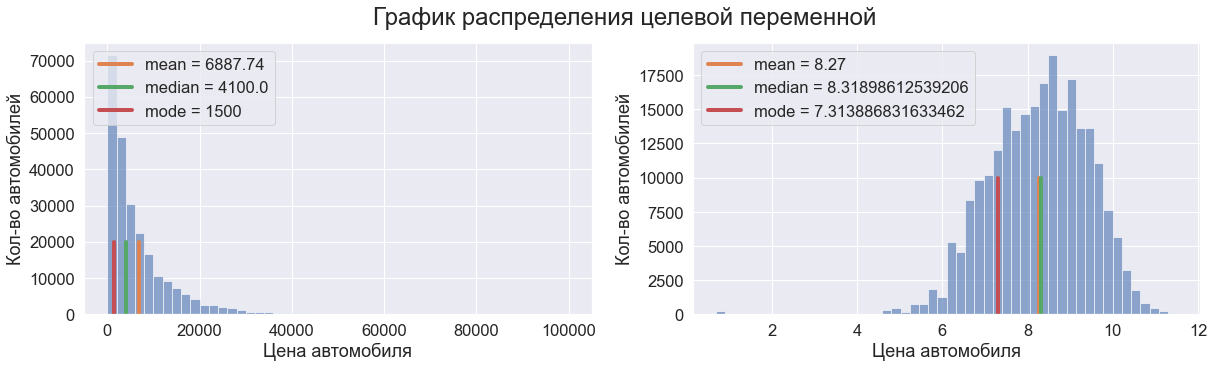

In [11]:
# Функция рассчета мер центральной тенденции
def get_mct(y):
    return {'mean': round(y.mean(), 2), 'median': y.median(), 'mode': y.mode()[0]}

# Формирование графиков
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 5))

# Построение гистограммы
ax[0].hist(data['price'], bins=50, alpha=0.6)
ax[1].hist(np.log1p(data['price']), bins=50, alpha=0.6)


# Построение мер центральной тенденции для ax0
y = np.linspace(0, 20000, 100)
for key, value in get_mct(data['price']).items():
    ax[0].plot([value] * 100, y, label=f'{key} = {value}', linestyle='-', linewidth=4)

# Построение мер центральной тенденции для ax1
y = np.linspace(0, 10000, 100)
for key, value in get_mct(np.log1p(data['price'])).items():
    ax[1].plot([value] * 100, y, label=f'{key} = {value}', linestyle='-', linewidth=4)

# Подписи осей
for x in ax:
    x.legend(loc = 'upper left')
    x.set_xlabel("Цена автомобиля")
    x.set_ylabel("Кол-во автомобилей")

fig.suptitle("График распределения целевой переменной", fontsize=24)
plt.show()

Логарифм целевой переменной имеет нормальное распределение, поэтому лучше заменить целевую переменную на её логарифм. На данный момент просто добавим новую переменную `price_log1p`. Перменная `price` будет использоваться для визуализации данных и обработки выбросов.

Представим ситуацию, когда настоящая стоимость машины 2000, а наша модель выдала значение 1900. Кажется, весьма неплохое приближение, но, аналогично предыдущему домашнему заданию, штраф при таком предсказании будет достаточно высоким. Чтобы избежать таких ситуаций, посчитаем логарифм от нашей целевой переменной.

In [12]:
data['price_log1p'] = np.log1p(data.price)

### Обработка выбросов

На первом графике распределение имеет "тяжёлый хвост" справа, это может мешать обучению линейной регрессии. Но этой проблемы нет у логарифма целевой переменной, так как будем использовать для обучения именно логарифм целевой переменной, то не будем считать выбросами (и соответственно, не будем удалять из данных) никакие большие значения.

Но вот график распределения логарифма целевой переменной выявил левый "тяжелый хвост" распределения, то есть целевуйю переменную со слишком маленькими значениями.

In [13]:
np.exp(4) - 1

53.598150033144236

Таким образом, объекты, у которых логарифм целевой переменной имеет значение меньшее, чем 4 имеют фактическую (указанную владельцем) стоимость меньше 53 евро (считаю, что цена в евро, так как речь идёт о немецком Ebay), а это слишком уж маленькая цена, поэтому можно приянть такие объекты за выбросы.

**Удаление выбросов**

In [14]:
mask = (data.price_log1p <= 4)
print(f'Будет удалено {mask.sum() * 100 / data.shape[0]:0.2f} % строк')

Будет удалено 0.15 % строк


In [15]:
data = data[~mask]

In [16]:
mask = (data.price > 60000)
print(f'Будет удалено {mask.sum() * 100 / data.shape[0]:0.2f} % строк')

Будет удалено 0.19 % строк


In [17]:
data = data[~mask]

## Зависимость целевой переменной от признака

### `brand `

Этот признак однозначно будет категориальным.

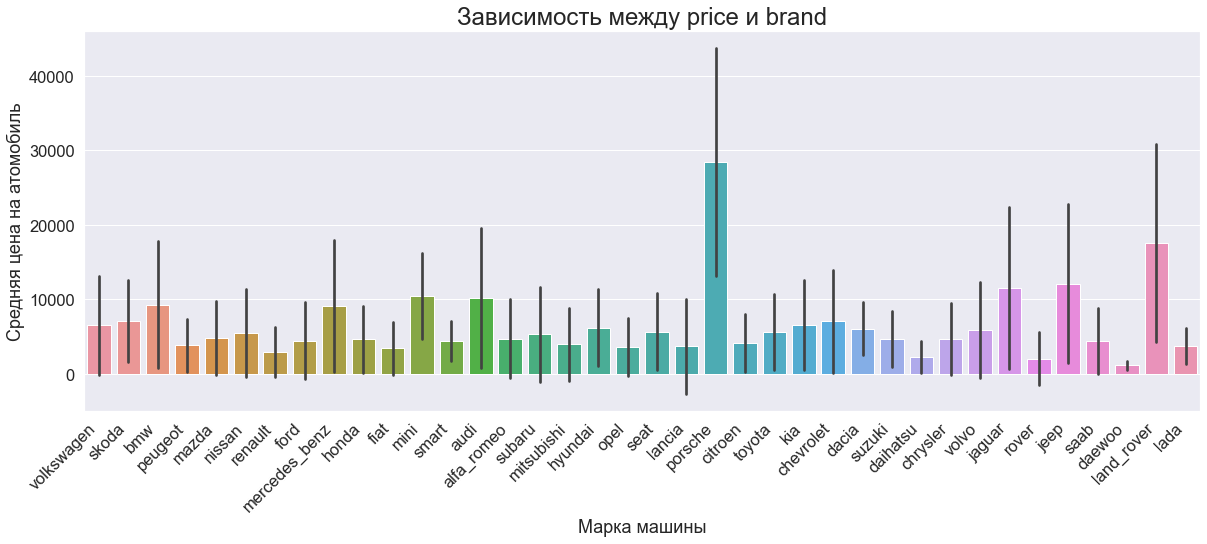

In [18]:
fig = plt.figure(figsize=(20, 7))
sns.barplot(y=data['price'], x=data['brand'], ci='sd')

plt.ylabel('Средняя цена на атомобиль', fontsize=18)
plt.xlabel('Марка машины', fontsize=18)
plt.xticks(rotation=45, ha='right')

plt.title('Зависимость между price и brand', fontsize=24)
plt.show()

Признак весьма хороший, как можно видеть по распределению (почти у всех брендов отличаются средние стоимости), поэтому оставим его как есть, потом просто закодируем с помощью One-Hot-Encoding.

### `model`

Категориальный признак.

In [19]:
len(data['model'].unique())

249

Поскольку категорий у этого признака очень много, нужно как-то с этим побороться. Посмотреть на графики мы, к сожалению, не сможем, поскольку нормально ничего разглядеть не получится.

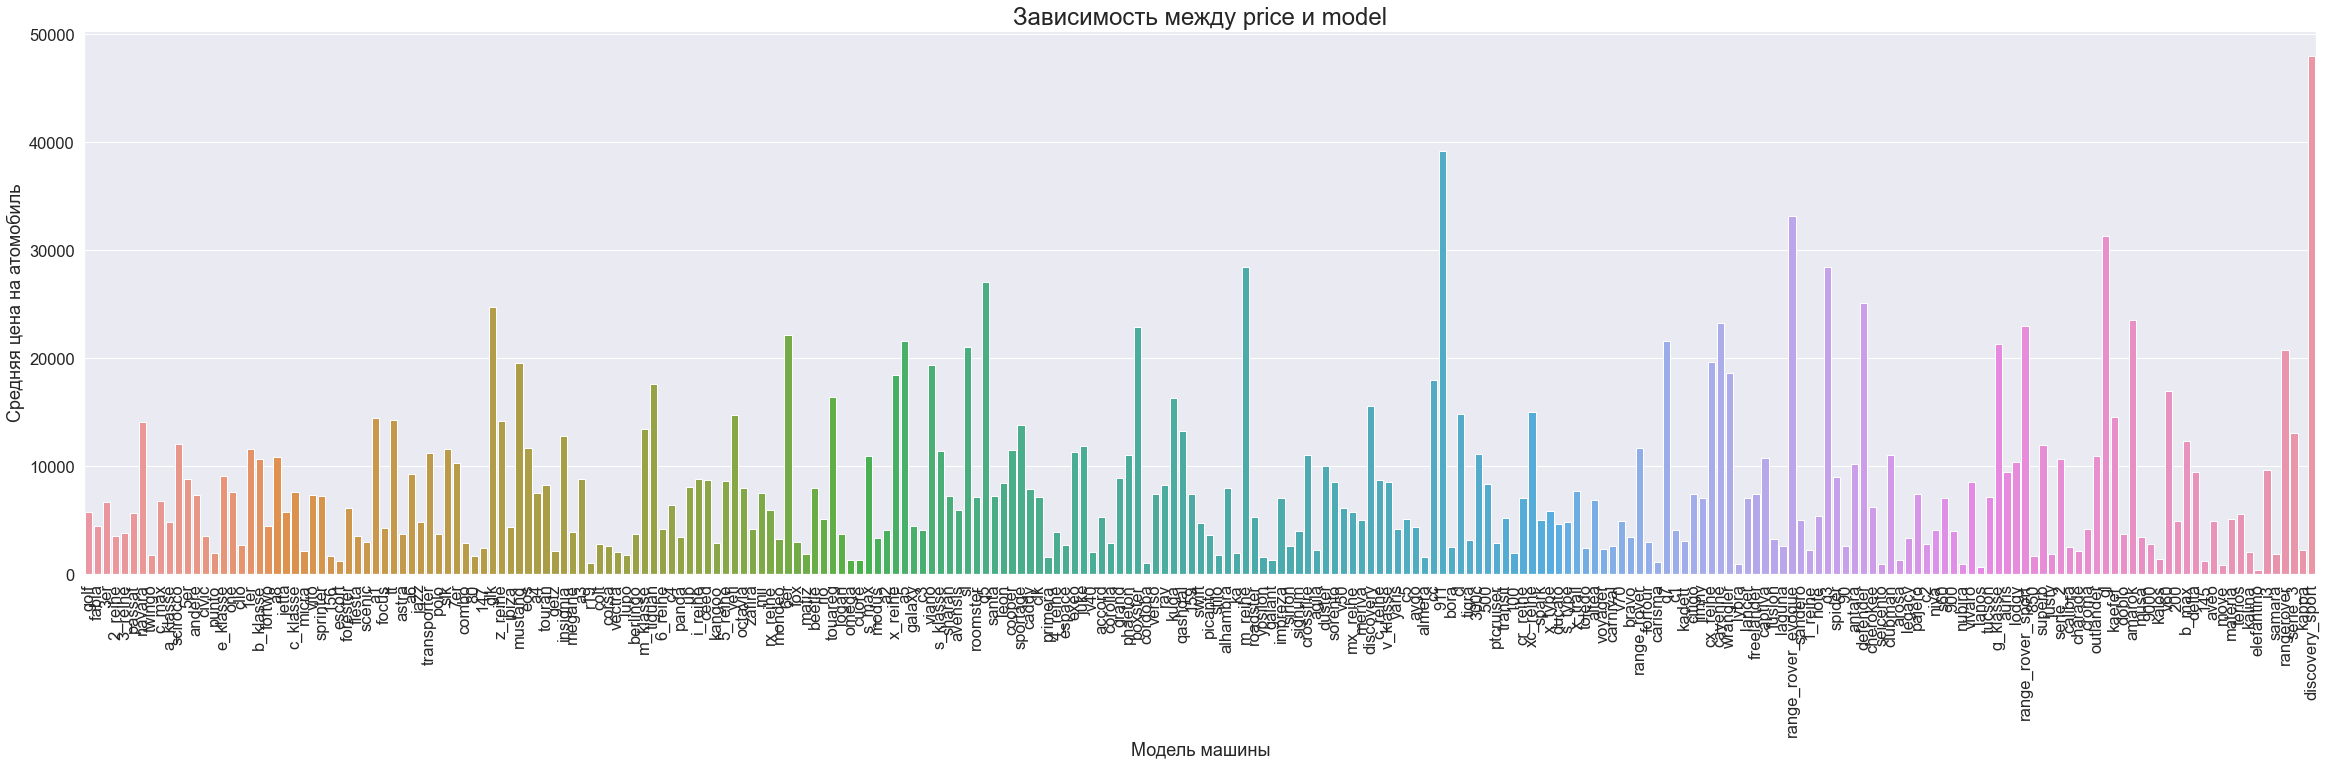

In [20]:
fig = plt.figure(figsize=(40, 10))
sns.barplot(y=data['price'], x=data['model'], ci=None)

plt.ylabel('Средняя цена на атомобиль', fontsize=18)
plt.xlabel('Модель машины', fontsize=18)
plt.xticks(rotation=90)

plt.title('Зависимость между price и model', fontsize=24)
plt.show()

Разделим набор на части, тогда мы сможем хорошо визуализировать результаты

In [21]:
from math import ceil

In [22]:
### Создание набора используемых признаков
batch_size = 43
count_сategories = len(data['model'].unique())
batch_count = ceil(count_сategories / batch_size)

batch_сategories = [data['model'].unique()[batch_size * (i - 1):batch_size * i] for i in range(1, batch_count + 1)]

### Проверка количества всех признаков
sum(map(len, batch_сategories))

249

In [23]:
### Формирование выборок с отобранными категориями
batch_data = []
for batch in batch_сategories:
    mask = (data.model.isin(batch))
    batch_data.append(data[mask])

print(f'Необходимо {batch_count} графиков')

Необходимо 6 графиков


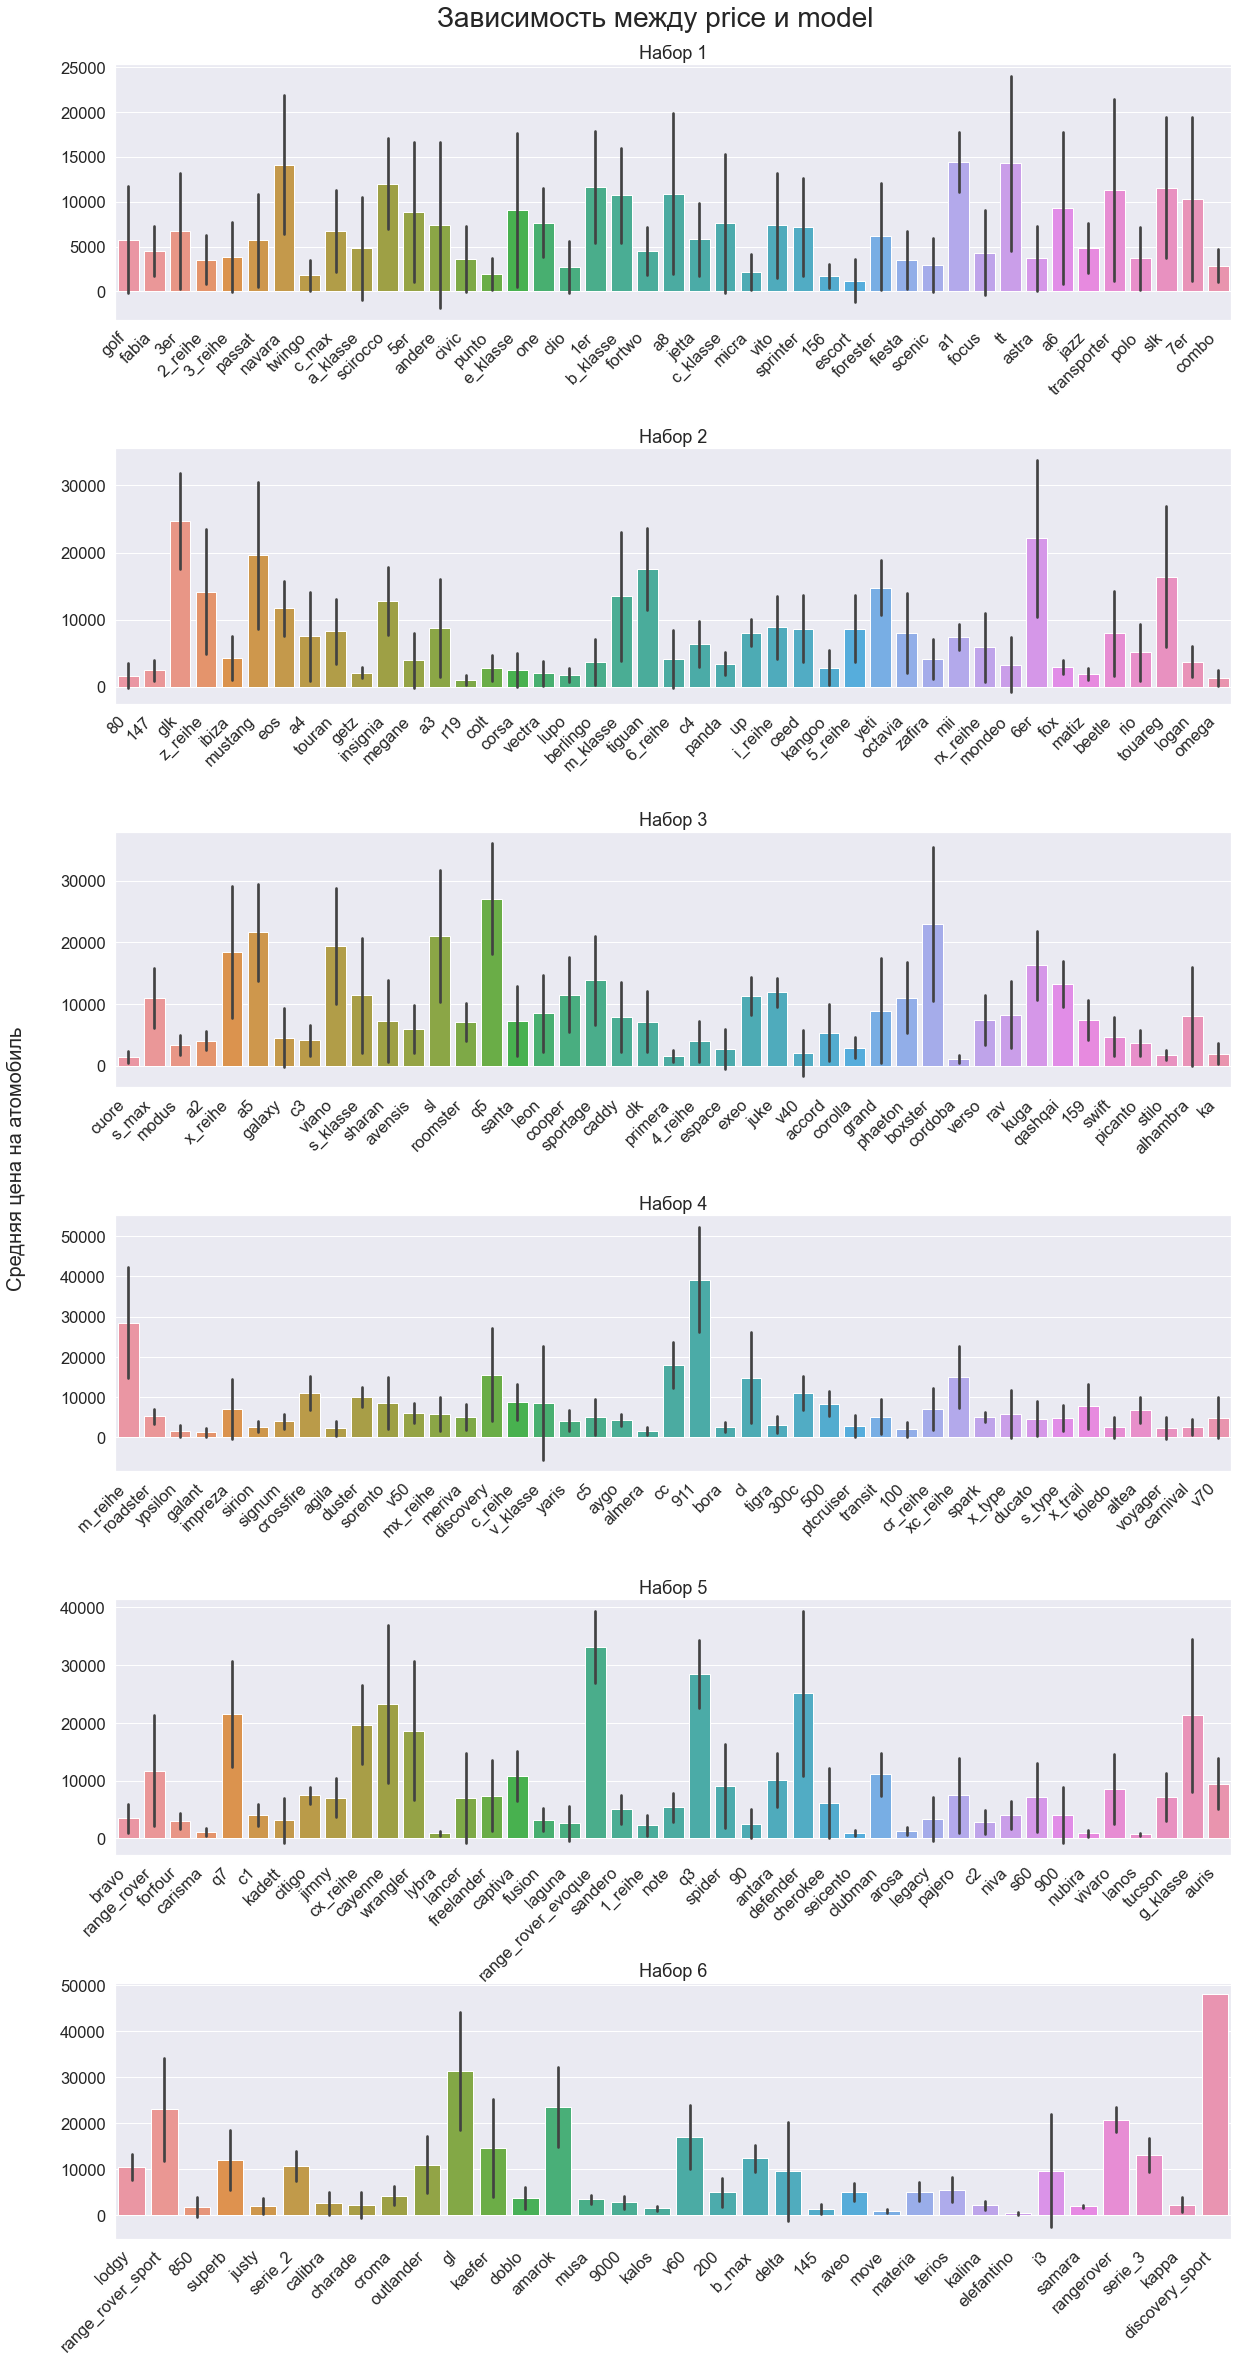

In [24]:
# Формирование графиков
fig, ax = plt.subplots(nrows=batch_count, ncols=1, figsize=(20, 40))

# Подписи области Figure
fig.suptitle('Зависимость между price и model', y=0.9, fontsize=28)
fig.supylabel('Средняя цена на атомобиль', y=0.5, x=0.05, fontsize=20)

# Построение каждго набора данных
for index, bdata in enumerate(batch_data):
    sns.barplot(y=bdata['price'], x=bdata['model'], ci='sd', ax=ax[index])
    plt.subplots_adjust(hspace=0.5)
    
    # Удаляем подписей осей у каждого графика в отедльности
    ax[index].set_xlabel('', fontsize=0)
    ax[index].set_ylabel('', fontsize=0)
    
    ax[index].set_title(f'Набор {index + 1}', fontsize=18, ha='center')
    
    # Наклон подписей https://www.delftstack.com/ru/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
    ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=45, ha='right')

# plt.title('Зависимость между price и model', fontsize=14)
# plt.xlabel('Модель машины', fontsize=12)

### `vehicleType`

Категориальный признак.

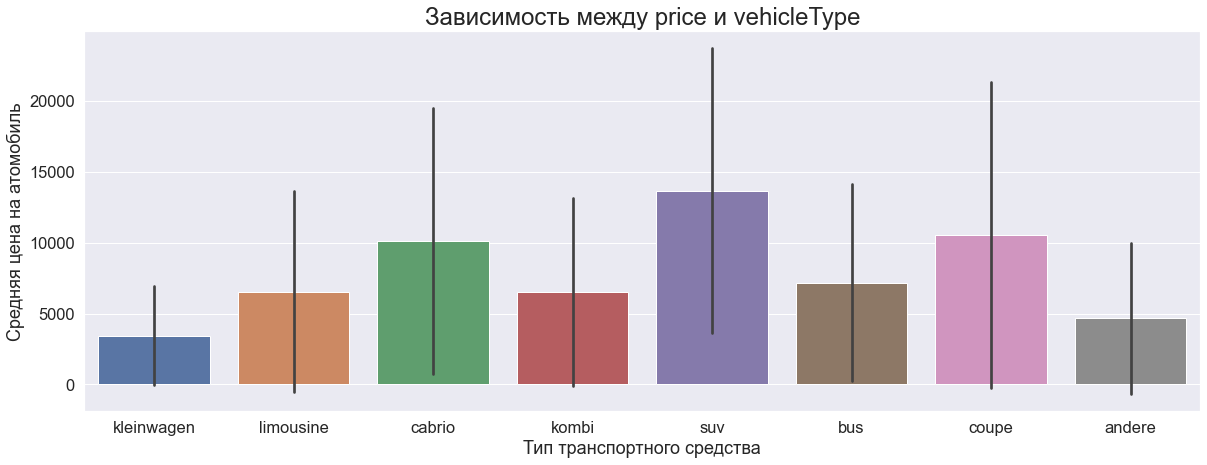

In [25]:
fig = plt.figure(figsize=(20, 7))
sns.barplot(y=data['price'], x=data['vehicleType'], ci='sd')

plt.ylabel('Средняя цена на атомобиль', fontsize=18)
plt.xlabel('Тип транспортного средства', fontsize=18)

plt.title('Зависимость между price и vehicleType', fontsize=24)
plt.show()

### `gearbox`

Категориальный признак.

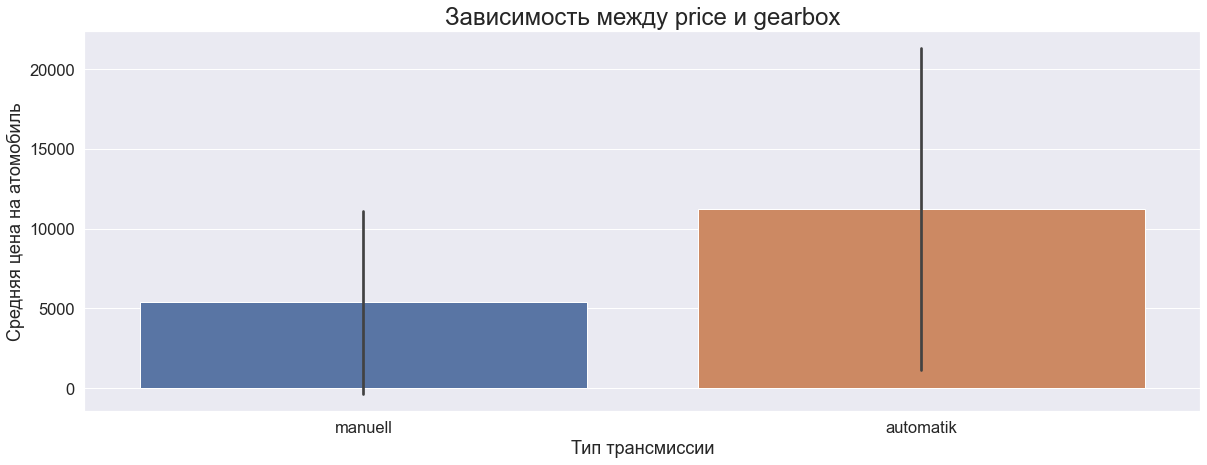

In [26]:
fig = plt.figure(figsize=(20, 7))
sns.barplot(y=data['price'], x=data['gearbox'], ci='sd')

plt.ylabel('Средняя цена на атомобиль', fontsize=18)
plt.xlabel('Тип трансмисcии', fontsize=18)

plt.title('Зависимость между price и gearbox', fontsize=24)
plt.show()

### `fuelType`

Категориальный признак.

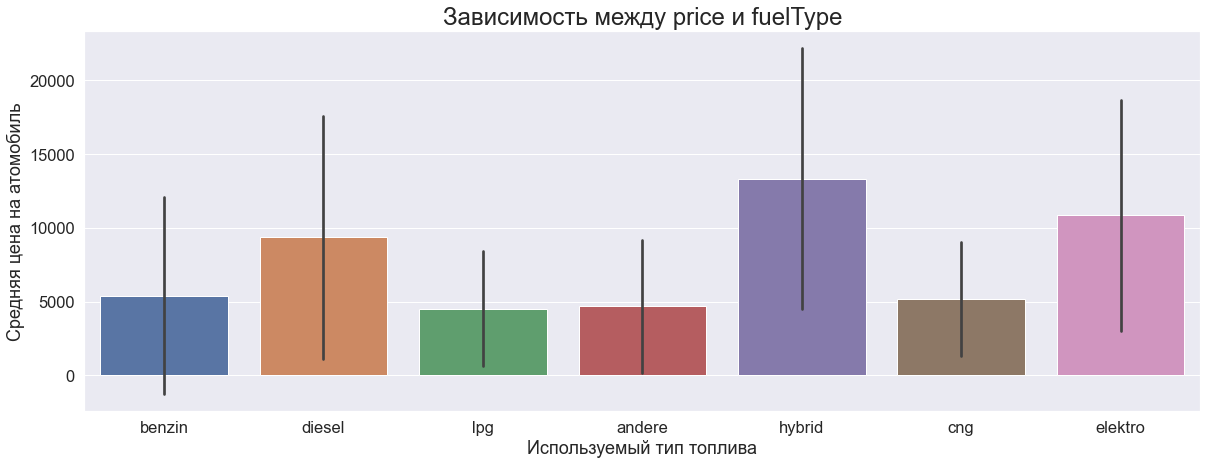

In [27]:
fig = plt.figure(figsize=(20, 7))
sns.barplot(y=data['price'], x=data['fuelType'], ci='sd')

plt.ylabel('Средняя цена на атомобиль', fontsize=18)
plt.xlabel('Используемый тип топлива', fontsize=18)

plt.title('Зависимость между price и fuelType', fontsize=24)
plt.show()

### `notRepairedDamage`

Бинарный признак.

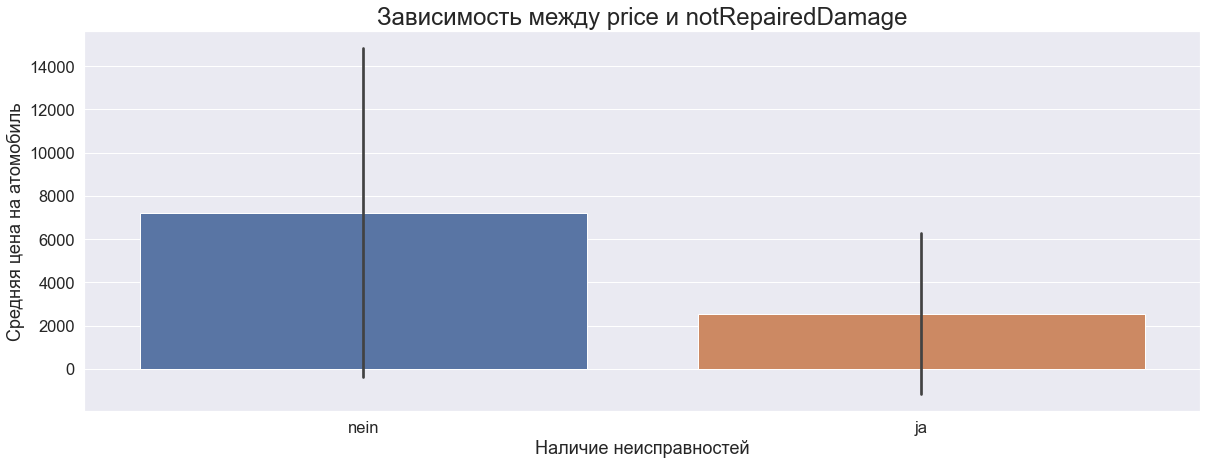

In [28]:
fig = plt.figure(figsize=(20, 7))
sns.barplot(y=data['price'], x=data['notRepairedDamage'], ci='sd')

plt.ylabel('Средняя цена на атомобиль', fontsize=18)
plt.xlabel('Наличие неисправностей', fontsize=18)

plt.title('Зависимость между price и notRepairedDamage', fontsize=24)
plt.show()

Данный признак имеет смысл кодировать 1 и 0, что позволит моделе легче уловить зависимость.

In [29]:
data['notRepairedDamage'] = (
    np.where(
        data['notRepairedDamage'] == 'nein',
        1, 0,
    )
)

### `powerPS`

Числовой признак.

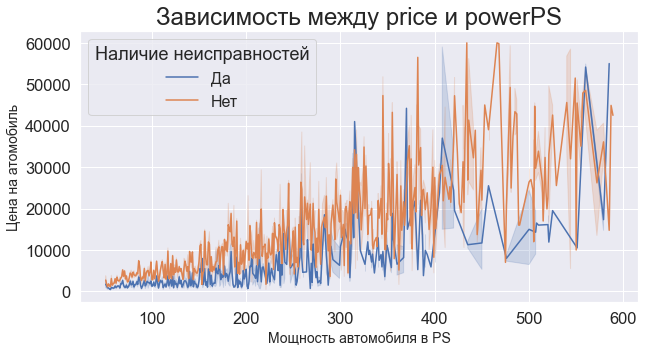

In [30]:
sns.lineplot(x="powerPS", y="price", hue='notRepairedDamage', data=data)

plt.ylabel('Цена на атомобиль', fontsize=14)
plt.xlabel('Мощность автомобиля в PS', fontsize=14)
plt.title('Зависимость между price и powerPS', fontsize=24)
plt.legend(['Да', 'Нет'], title='Наличие неисправностей', fontsize=16)

plt.show()

Наблюдаем большие коллебания цены - причиной может быть воздействие категориальных признаков и график это подтверждает частично. В нашем случае наличие неисправностей приводит к понижению цены, что логично.

### `kilometer` 

Числовой признак.

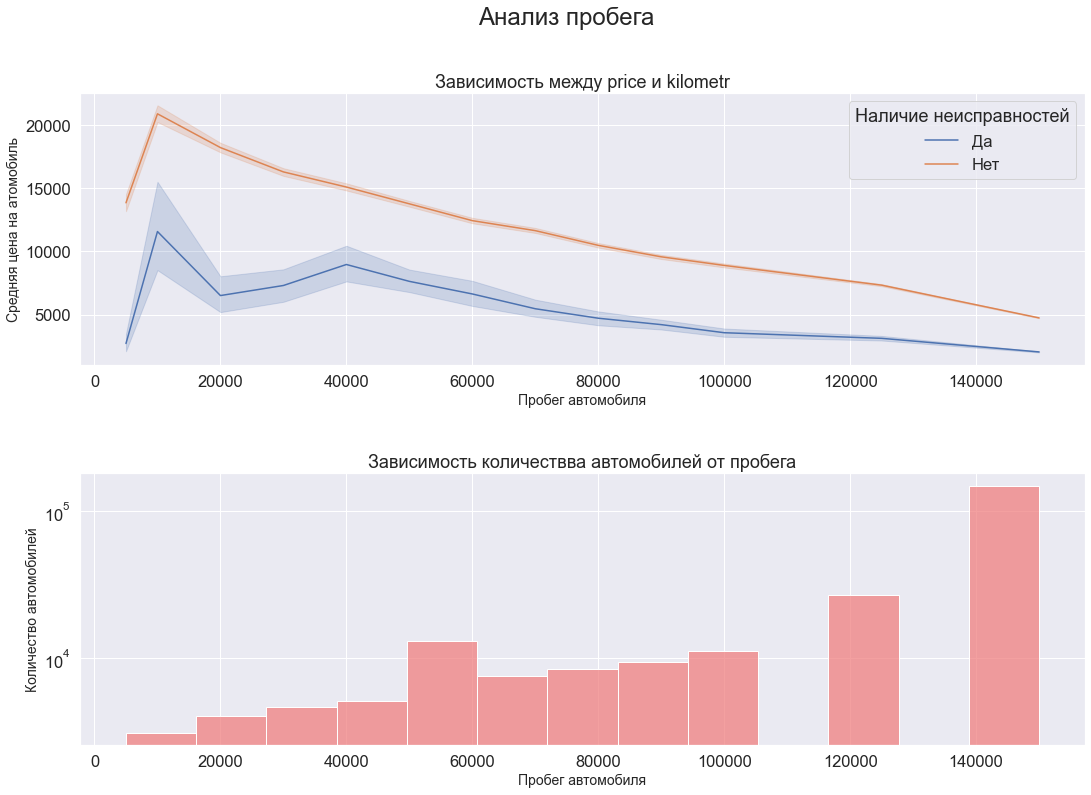

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))

sns.lineplot(x="kilometer", y="price", hue='notRepairedDamage', data=data, ax=ax[0])
ax[0].set_title('Зависимость между price и kilometr', fontsize=18)
ax[0].set_xlabel('Пробег автомобиля', fontsize=14)
ax[0].set_ylabel('Средняя цена на атомобиль', fontsize=14)
ax[0].legend(['Да', 'Нет'], title='Наличие неисправностей')

sns.histplot(x = data.kilometer, color='lightcoral', log_scale=(False, True), bins=13, ax=ax[1])
ax[1].set_title('Зависимость количествва автомобилей от пробега', fontsize=18)
ax[1].set_xlabel('Пробег автомобиля', fontsize=14)
ax[1].set_ylabel('Количество автомобилей', fontsize=14)

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Анализ пробега", fontsize=24)
plt.show()

### `autoAgeMonths`

Числовой признак.

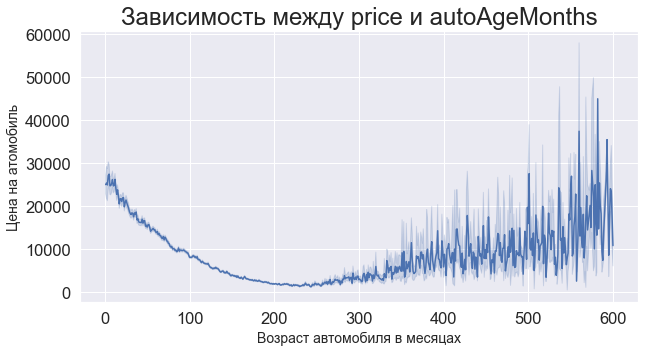

In [32]:
sns.lineplot(x="autoAgeMonths", y="price", data=data)

plt.ylabel('Цена на атомобиль', fontsize=14)
plt.xlabel('Возраст автомобиля в месяцах', fontsize=14)
plt.title('Зависимость между price и autoAgeMonths', fontsize=24)

plt.show()

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

### Разделение признаков

Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.

In [33]:
categorical = ['brand', 'gearbox', 'fuelType', 'vehicleType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['notRepairedDamage']

In [34]:
data.drop('price', axis=1, inplace=True)
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price_log1p']

###  Преобразование признаков
Подумайте, какие трансформации признаков из известных вам будет уместно применить

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

### Разбивка данных
Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8)
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.5)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [37]:
from sklearn.metrics import r2_score

In [38]:
alphas = np.logspace(-3, 0, 15)

descents = ['full', 'stochastic', 'momentum', 'adam']
dimension_ = X_train.shape[1]

# Данные пораметры лучшие с точки зрения ошибки
lambda_spaces = { # Запишем наиболее подходящие шаги
    'full': np.logspace(0., 0.3, 15),
    'stochastic': np.logspace(-0.4, -0.1, 15),
    'momentum': np.logspace(-0.4, 0, 15),
    'adam': np.logspace(0., 0.3,  15),
}

# Данные пораметры лучшие с точки зрения визуализации графиков
# lambda_spaces = { # Запишем наиболее подходящие шаги
#     'full': np.logspace(-0.9, -0.2, 15),
#     'stochastic': np.logspace(-0.9, -0.2, 15),
#     'momentum': np.logspace(-0.9, -0.2, 15),
#     'adam': np.logspace(-0.9, -0.2, 15),
# }

best_lambdas = { # Лучшее значение шага
    'full':   None,
    'stochastic': None,
    'momentum':   None,
    'adam':    None,
}


for descent_name_ in descents:
    best_loss = np.inf
    
    print(f'Descent type = {descent_name_}:')
    
    for i, lambda_ in enumerate(lambda_spaces[descent_name_]):
        descent_config = {
            'descent_name': descent_name_,
            'kwargs': {'dimension': dimension_, 'lambda_' : lambda_}
        }
        
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_train, np.array(y_train))
        
        train_loss = regression.calc_loss(X_train, np.array(y_train))
        validate_loss = regression.calc_loss(X_validate, np.array(y_validate))
        r2_validate = r2_score(y_validate, regression.predict(X_validate))
        r2_train = r2_score(y_train, regression.predict(X_train))

        print(f'    lambda = {lambda_:6f}')
        print(f'    train loss = {train_loss:6f}, R^2 score = {r2_train:6f} {" " * 10} validation loss = {validate_loss:6f}, R^2 score = {r2_validate:6f}')

        if validate_loss < best_loss:
            best_loss = validate_loss
            best_lambdas[descent_name_] = lambda_
    print('=' * 30)

Descent type = full:
    lambda = 1.000000
    train loss = 0.337565, R^2 score = 0.727828            validation loss = 0.338277, R^2 score = 0.728729
    lambda = 1.050579
    train loss = 0.338679, R^2 score = 0.726930            validation loss = 0.339923, R^2 score = 0.727410
    lambda = 1.103716
    train loss = 0.354974, R^2 score = 0.713791            validation loss = 0.358348, R^2 score = 0.712634
    lambda = 1.159540
    train loss = 0.344154, R^2 score = 0.722515            validation loss = 0.345372, R^2 score = 0.723040
    lambda = 1.218188
    train loss = 0.335084, R^2 score = 0.729828            validation loss = 0.336897, R^2 score = 0.729836
    lambda = 1.279802
    train loss = 0.331936, R^2 score = 0.732367            validation loss = 0.333378, R^2 score = 0.732658
    lambda = 1.344533
    train loss = 0.328929, R^2 score = 0.734791            validation loss = 0.331768, R^2 score = 0.733949
    lambda = 1.412538
    train loss = 0.333249, R^2 score = 0.731308

#### Обучение на лучших параметрах

In [39]:
loss_history = {}
iteration_max = {}

descents = ['full', 'stochastic', 'momentum', 'adam']
dimension_ = X_train.shape[1]

for descent_name_ in descents:
    print(f'Descent type = {descent_name_}:')
    
    descent_config = {
        'descent_name': descent_name_,
        'kwargs': {'dimension': dimension_, 'lambda_' : best_lambdas[descent_name_]}
    }

    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, np.array(y_train))
    
    loss_history[descent_name_] = regression.loss_history
    iteration_max[descent_name_] = len(regression.loss_history)
    
    train_loss = regression.calc_loss(X_train, np.array(y_train))
    validate_loss = regression.calc_loss(X_validate, np.array(y_validate))
    r2_validate = r2_score(y_validate, regression.predict(X_validate))
    r2_train = r2_score(y_train, regression.predict(X_train))
    
    print(f'    lambda= {best_lambdas[descent_name_]:6f}')
    print(f'    train loss = {train_loss:6f}, R^2 score= {r2_train:6f} {" " * 10} validation loss = {validate_loss:6f}, R^2 score = {r2_validate:6f}')
    print('=' * 30)

Descent type = full:
    lambda= 1.995262
    train loss = 0.313131, R^2 score= 0.747529            validation loss = 0.313645, R^2 score = 0.748482
Descent type = stochastic:
    lambda= 0.509498
    train loss = 0.347550, R^2 score= 0.719777            validation loss = 0.349186, R^2 score = 0.719981
Descent type = momentum:
    lambda= 0.820891
    train loss = 0.309353, R^2 score= 0.750575            validation loss = 0.309195, R^2 score = 0.752050
Descent type = adam:
    lambda= 1.000000
    train loss = 0.316644, R^2 score= 0.744696            validation loss = 0.316024, R^2 score = 0.746575


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

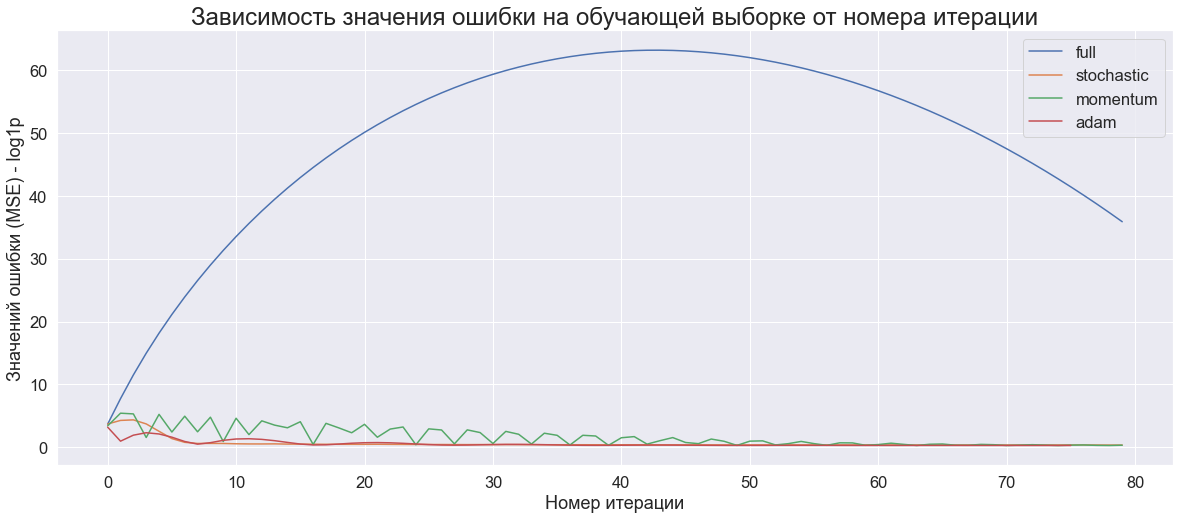

In [40]:
fig = plt.figure(figsize=(20, 8))

# Ограничим число итераций до 80
for descent_name_ in descents:
    plt.plot(np.arange(iteration_max[descent_name_])[:80], np.log1p(loss_history[descent_name_][:80]), label=descent_name_)
    
plt.title('Зависимость значения ошибки на обучающей выборке от номера итерации', fontsize=24)
plt.xlabel('Номер итерации', fontsize=18)
plt.ylabel('Значений ошибки (MSE) - log1p', fontsize=18)
plt.legend()
plt.show()

**Stochastic**

Самую быструю сходимость показал стохастический градиентный спуск. При этом стохастический градиентный спуск не останавливается раньше, чем пройдёт заданной колличество итерраций, это связанно с тем, что ошибка на небольшом случайном баче редко может оказаться около нулевой, поэтому этот метод всегда отрабатывает до конца и много итераций тратятся впустую блуждая около минимума. Несмотря на это стохастический градиентный спуск, очевидно затрачивает гораздо меньше времени на каждую из итераций (из-за упрощённого подсчёта градиентов), поэтому вряд-ли он уступает во времени работы остальным методам.

**Adam and momentum**

Методы Adam и Momentum, показали примерно одинаковый результат по числу требуемых итераций, хотя Adam и имеет более плавную сходимость. Вообще, одно из основных преимуществ Momentum - это то, что этот метод может проскакивать локальные минимумы и мы с большей вероятность в итоге попадём глобальный минимум (такое же свойство присутствует и у Adam), но так как в этой задаче мы оптимизируем простую MSE, тут эти методы не могут показать свою сильную сторону в этом.

**Full**

Обычный градиентный спуск в самом начале имеет сильный скачёк ошибки, но потом так же как и остальные методы сходится к минимуму, при чём этому методу понадобилось меньше всего итерраций, чтобы дойти до минимума. Это связано с тем, что градиенты у этого метода точнее навравлены в сторону минимумы (по сравнению с стохатическим методом), а так как функция, которую мы оптимизируем достаточно простая (MSE) и не имеет локальных минимумов, а все данные мы отшкалировали и Momentum не имеет здесь преимущества в отсутствии осциляций по сравнению с обычным градиентным спуском, поэтому и получается, что обычному GD понадобилось меньше итерраций, чтобы сойтись в минимум.

Но, скорее всего времени на это ушло гораздо больше, чем для стахостического GD, так как подсчёт градиентов на каждом шаге более трудоёмкий.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [42]:
from time import time

In [43]:
batch_sizes = np.arange(5, 500, 10)
dimension_ = X_train.shape[1]
times_res = []
iterations_res = []

for batch_size in batch_sizes:
    times = []
    iterations = []   
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': dimension_,
            'lambda_' : best_lambdas['stochastic'], # использую лучшую лямбду для этого эксперимента
            'batch_size' : batch_size
        }
    }
    for k in range(10):
        regression = LinearRegression(descent_config=descent_config)
        start = time()
        regression.fit(X_train, np.array(y_train))
        times.append(time() - start)
        iterations.append(len(regression.loss_history))

    times_res.append(np.array(times).mean())
    iterations_res.append(np.array(iterations).mean())

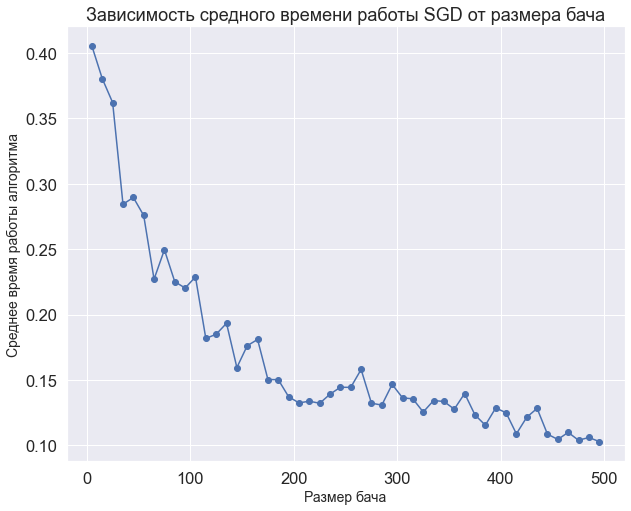

In [44]:
plt.figure(figsize=(10, 8))
plt.plot(batch_sizes, times_res, marker='o')
plt.title('Зависимость средного времени работы SGD от размера бача', fontsize=18)
plt.xlabel('Размер бача', fontsize=14)
plt.ylabel('Среднее время работы алгоритма', fontsize=14)
plt.show()

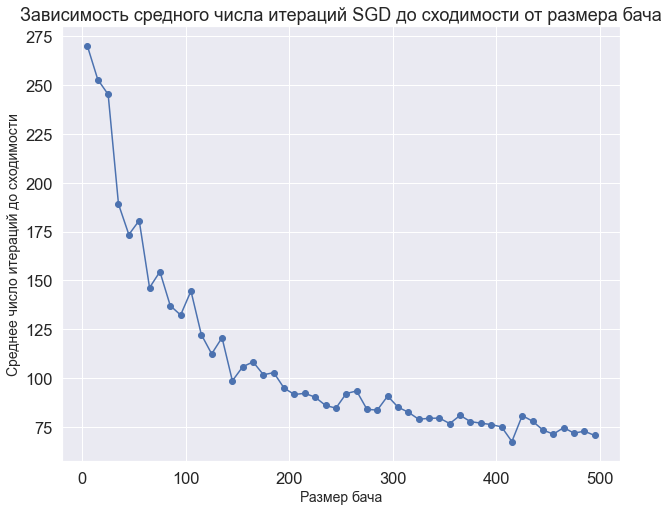

In [45]:
plt.figure(figsize=(10, 8))
plt.plot(batch_sizes, iterations_res, marker='o')
plt.title('Зависимость средного числа итераций SGD до сходимости от размера бача', fontsize=18)
plt.xlabel('Размер бача', fontsize=14)
plt.ylabel('Среднее число итераций до сходимости', fontsize=14)
plt.show()

По графикам хорошо видно, что и число итераций до сходимости SGD и время работы алгоритма SGD обратно пропорциональны размеру бача. Таким образом, можно сделать вывод, что для более быстрого обучения модели не стоит брать слишком маленькие бачи, так как это только замедляет работу алгоритма. Но в то же время, если брать слишком большие бачи, о вероятнее всего, что время работы алгоритма увеличилось бы уже из-за более сложного вычисления градиента на каждом шаге SGD.

Поэтому, можно сказать, что подбор размера бача важен при обучении модели с помощью SGD, так как может существенно повлиять на скороть обучения при обучении более сложных моделей, например для нейронных сетей, это может быть очень важным фактором.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: OK

### Подбор параметров $\lambda$ и $\mu$

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import math

descents = ['full', 'stochastic', 'momentum', 'adam']
dimension_ = X_train.shape[1]

# Данные пораметры лучшие с точки зрения ошибки
lambda_spaces = { # Запишем наиболее подходящие шаги
    'full': np.logspace(0., 0.3, 15),
    'stochastic': np.logspace(-0.4, -0.1, 15),
    'momentum': np.logspace(-0.4, 0, 15),
    'adam': np.logspace(0., 0.3,  15),
}

# Данные пораметры лучшие с точки зрения визуализации графиков
lambda_spaces = { # Запишем наиболее подходящие шаги
    'full': np.logspace(-0.9, -0.2, 15),
    'stochastic': np.logspace(-0.9, -0.2, 15),
    'momentum': np.logspace(-0.9, -0.2, 15),
    'adam': np.logspace(-0.9, -0.2, 15),
}

# mu_spaces = np.logspace(-3, -0.7, 15)
mu_spaces = np.logspace(-0.7, -0.3, 5)

best_lambdas = { # Лучшее значение шага
    'full':   None,
    'stochastic': None,
    'momentum':   None,
    'adam':    None,
}

best_mu = { # Лучшее значение шага
    'full':   None,
    'stochastic': None,
    'momentum':   None,
    'adam':    None,
}


for descent_name_ in descents:
    best_loss = np.inf
    print(f'{"_" * 25} Descent type = {descent_name_} {"_" * 25}')
    
    for mu_ in mu_spaces:
        is_print = False
        for i, lambda_ in enumerate(lambda_spaces[descent_name_]):
            descent_config = {
                'descent_name': descent_name_, 'regularized': True,
                'kwargs': {'dimension': dimension_, 'lambda_' : lambda_, 'mu': mu_}
            }

            regression = LinearRegression(descent_config=descent_config)
            regression.fit(X_train, np.array(y_train))

            train_loss = regression.calc_loss(X_train, np.array(y_train))
            validate_loss = regression.calc_loss(X_validate, np.array(y_validate))
            r2_validate = r2_score(y_validate, regression.predict(X_validate))
            r2_train = r2_score(y_train, regression.predict(X_train))

            if validate_loss < best_loss:
                best_loss = validate_loss
                best_lambdas[descent_name_] = lambda_
                best_mu[descent_name_] = mu_
                print(f'    lambda = {lambda_:6f} {" " * 10} mu =  {mu_:6f}')
                print(f'    train loss = {train_loss:6f}, R^2 score= {r2_train:6f} {" " * 10} validation loss = {validate_loss:6f}, R^2 score= {r2_validate:6f}\n')
                is_print = True
        
        if is_print:
            print('=' * 30)

_________________________ Descent type = full _________________________
    lambda = 0.125893            mu =  0.199526
    train loss = 0.603674, R^2 score= 0.513269            validation loss = 0.603520, R^2 score= 0.516026

    lambda = 0.141254            mu =  0.199526
    train loss = 0.549427, R^2 score= 0.557008            validation loss = 0.551873, R^2 score= 0.557442

    lambda = 0.158489            mu =  0.199526
    train loss = 0.509787, R^2 score= 0.588968            validation loss = 0.510651, R^2 score= 0.590499

    lambda = 0.177828            mu =  0.199526
    train loss = 0.485348, R^2 score= 0.608673            validation loss = 0.486800, R^2 score= 0.609625

    lambda = 0.199526            mu =  0.199526
    train loss = 0.467888, R^2 score= 0.622751            validation loss = 0.469310, R^2 score= 0.623651

    lambda = 0.223872            mu =  0.199526
    train loss = 0.435730, R^2 score= 0.648679            validation loss = 0.437210, R^2 score= 0.649393

#### Обучение на лучших параметрах

In [47]:
loss_history_reg = {}
iteration_max_reg = {}

descents = ['full', 'stochastic', 'momentum', 'adam']
dimension_ = X_train.shape[1]

for descent_name_ in descents:
    print(f'Descent type = {descent_name_}:')
    
    descent_config = {
        'descent_name': descent_name_, 'regularized' : True,
        'kwargs': {'dimension': dimension_, 'lambda_' : best_lambdas[descent_name_], 'mu': best_mu[descent_name_]}
    }

    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, np.array(y_train))
    
    loss_history_reg[descent_name_] = regression.loss_history
    iteration_max_reg[descent_name_] = len(regression.loss_history)
    
    train_loss = regression.calc_loss(X_train, np.array(y_train))
    validate_loss = regression.calc_loss(X_validate, np.array(y_validate))
    r2_validate = r2_score(y_validate, regression.predict(X_validate))
    r2_train = r2_score(y_train, regression.predict(X_train))

    print(f'lambda = {lambda_:6f} {" " * 10} mu =  {mu_:6f}')
    print(f'train loss = {train_loss:6f}, R^2 score= {r2_train:6f} {" " * 10} validation loss = {validate_loss:6f}, R^2 score= {r2_validate:6f}\n')
    print('=' * 30)

Descent type = full:
lambda = 0.630957            mu =  0.501187
train loss = 0.341960, R^2 score= 0.724284            validation loss = 0.341897, R^2 score= 0.725826

Descent type = stochastic:
lambda = 0.630957            mu =  0.501187
train loss = 0.332262, R^2 score= 0.732103            validation loss = 0.332322, R^2 score= 0.733505

Descent type = momentum:
lambda = 0.630957            mu =  0.501187
train loss = 0.331116, R^2 score= 0.733028            validation loss = 0.330529, R^2 score= 0.734943

Descent type = adam:
lambda = 0.630957            mu =  0.501187
train loss = 0.359601, R^2 score= 0.710060            validation loss = 0.359354, R^2 score= 0.711827



### Визуализация результатов

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [48]:
def draw_regs(descent_name, max_iter=50):
    plt.plot(np.arange(iteration_max[descent_name])[:max_iter], loss_history[descent_name][:max_iter], label=f'{descent_name}')
    plt.plot(np.arange(iteration_max_reg[descent_name])[:max_iter], loss_history_reg[descent_name][:max_iter], label=f'{descent_name} reg')

    plt.title('Зависимость значения ошибки на обучающей выборке от номера итерации',  fontsize=18)
    plt.xlabel('Номер итерации',  fontsize=14)
    plt.ylabel('Значений ошибки (MSE)',  fontsize=14)
    plt.legend(loc="upper right")

    plt.show()

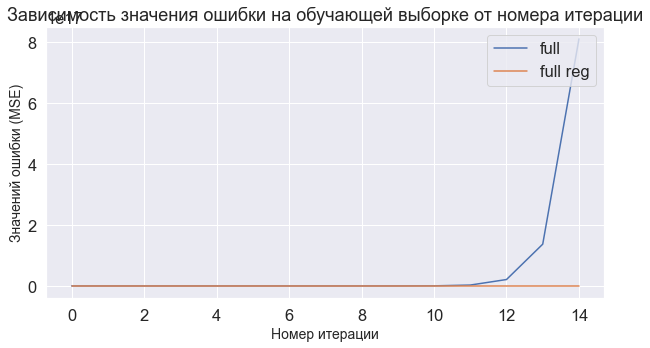

In [49]:
draw_regs('full', 15)

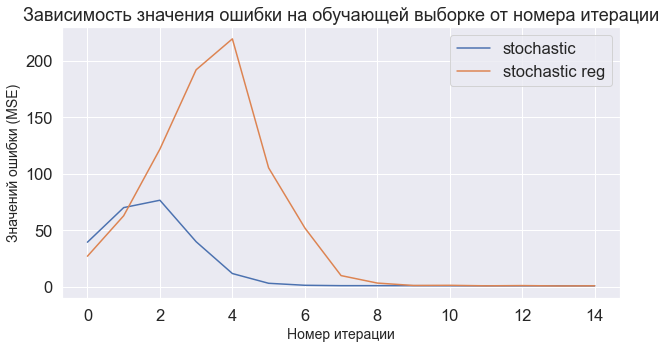

In [50]:
draw_regs('stochastic', 15)

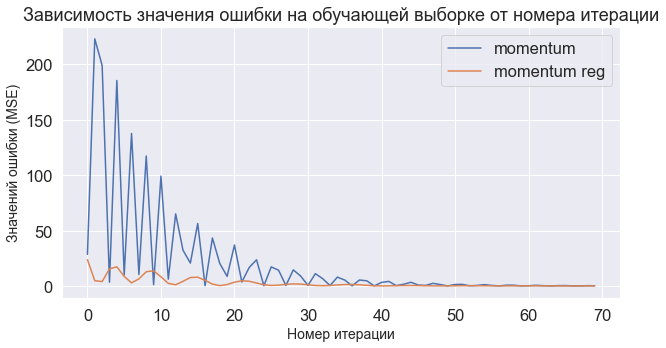

In [51]:
draw_regs('momentum', 70)

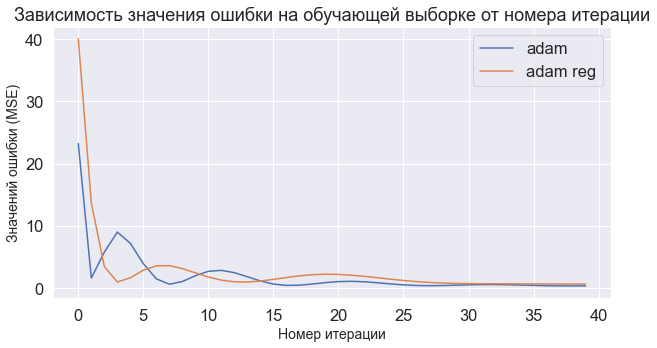

In [52]:
draw_regs('adam', 40)

Можно увидеть, что регуляризация при сравнении лучших результатов дает одинаковый результат как на обучающей, так и на тестовых выборках на всех методах. Это связано с данными, модель без регуляризации почти не переобучалась, поэтому мы не видим большого эффекта воздействия регуляризации. 

Также интересно отметить, что число итераций везде с регуляризацией занимает максимальное дефолтное значение. Объяснение кроется в общем эффекте регуляризации. Регуляризация не позволяет сделать ошибку на определенном этапе меньше tolerance, что не позволяет прекратить обучение на обучающей выборке и задействуется максимальное количество итераций.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$\large L(y, a) = \log\left(\cosh(a - y)\right)$$

Запишем вид функционала ошибки:

$\large Q(a, X) = \frac{1}{\ell}\sum\limits_{i=1}^{\ell}{L(y_i, a(x_i))}$

Функционал ошибки для нашей функции потерь:

$\large \large Q(a, X) = \frac{1}{\ell}\sum\limits_{i=1}^{\ell}{\log\left(\cosh(a(x_i) - y_i)\right)}$

Для линейной регрессии:

$\large \large Q(w, X) = \frac{1}{\ell}\sum\limits_{i=1}^{\ell}{\log\left(\cosh(X_i w - y_i)\right)}$

В матричном виде:

$\large \large Q(w, X) = \frac{1}{\ell} {\log\left(\cosh(Xw - y)\right)}$

<h4 align='center'>Решение:</h4>

$\large \mathrm{d}_w[log(cosh(Xw-y))] = \frac{1}{cosh(Xw-y)} \mathrm{d}_w cosh(Xw-y) = $

$\large = \frac{1}{cosh(Xw-y)} sinh(Xw-y) \mathrm{d}_w (Xw-y) =$

$\large = \frac{sinh(Xw-y)}{cosh(Xw-y)} \mathrm{d}_w (Xw-y) =$

$\large = th(Xw-y) \mathrm{d}_w (Xw-y) =$

$\large = th(Xw-y) \mathrm{d}_w (Xw) =$

$\large = th(Xw-y) X \mathrm{d} w =$

$\large = \langle X^T th(Xw-y)^T,  \mathrm{d}w \rangle$

Так как транспонирование ничего не меняет, можем его не выполнять и получаем:

$\large \nabla_w Q = th(Xw-y)X$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [53]:
from descents import LossFunction

In [54]:
alphas = np.logspace(-3, 0, 15)

descents = ['full', 'stochastic', 'momentum', 'adam']
dimension_ = X_train.shape[1]

# Данные пораметры лучшие с точки зрения ошибки
lambda_spaces = { # Запишем наиболее подходящие шаги
    'full': np.logspace(0., 0.3, 15),
    'stochastic': np.logspace(-0.4, -0.1, 15),
    'momentum': np.logspace(-0.4, 0, 15),
    'adam': np.logspace(0., 0.3,  15),
}

# Данные пораметры лучшие с точки зрения визуализации графиков
lambda_spaces = { # Запишем наиболее подходящие шаги
    'full': np.logspace(0.4, 0.7, 15),
    'stochastic': np.logspace(0.4, 0.7, 15),
    'momentum': np.logspace(0.4, 0.7, 15),
    'adam': np.logspace(0.4, 0.7, 15),
}

best_lambdas = { # Лучшее значение шага
    'full':   None,
    'stochastic': None,
    'momentum':   None,
    'adam':    None,
}


for descent_name_ in descents:
    best_loss = np.inf
    
    print(f'Descent type = {descent_name_}:')
    
    for i, lambda_ in enumerate(lambda_spaces[descent_name_]):
        descent_config = {
            'descent_name': descent_name_,
            'kwargs': {'dimension': dimension_, 'lambda_' : lambda_, 'loss_function': LossFunction.LogCosh}
        }
        
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_train, np.array(y_train))
        
        train_loss = regression.calc_loss(X_train, np.array(y_train))
        validate_loss = regression.calc_loss(X_validate, np.array(y_validate))
        r2_validate = r2_score(y_validate, regression.predict(X_validate))
        r2_train = r2_score(y_train, regression.predict(X_train))

        print(f'    lambda = {lambda_:6f}')
        print(f'    train loss = {train_loss:6f}, R^2 score = {r2_train:6f} {" " * 10} validation loss = {validate_loss:6f}, R^2 score = {r2_validate:6f}')

        if validate_loss < best_loss:
            best_loss = validate_loss
            best_lambdas[descent_name_] = lambda_
    print('=' * 30)

Descent type = full:
    lambda = 2.511886
    train loss = 0.139516, R^2 score = 0.704833            validation loss = 0.140448, R^2 score = 0.705047
    lambda = 2.638934
    train loss = 0.138404, R^2 score = 0.707420            validation loss = 0.139400, R^2 score = 0.707821
    lambda = 2.772408
    train loss = 0.134404, R^2 score = 0.713693            validation loss = 0.135036, R^2 score = 0.715594
    lambda = 2.912633
    train loss = 0.134186, R^2 score = 0.712436            validation loss = 0.135241, R^2 score = 0.712864
    lambda = 3.059950
    train loss = 0.132180, R^2 score = 0.720010            validation loss = 0.132444, R^2 score = 0.722323
    lambda = 3.214718
    train loss = 0.136362, R^2 score = 0.708778            validation loss = 0.136960, R^2 score = 0.710578
    lambda = 3.377314
    train loss = 0.130260, R^2 score = 0.720791            validation loss = 0.130850, R^2 score = 0.721901
    lambda = 3.548134
    train loss = 0.129632, R^2 score = 0.722332

#### Обучение на лучших параметрах

In [55]:
loss_history = {}
iteration_max = {}

descents = ['full', 'stochastic', 'momentum', 'adam']
dimension_ = X_train.shape[1]

for descent_name_ in descents:
    print(f'Descent type = {descent_name_}:')
    
    descent_config = {
        'descent_name': descent_name_,
        'kwargs': {'dimension': dimension_, 'lambda_' : best_lambdas[descent_name_], 'loss_function': LossFunction.LogCosh}
    }

    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, np.array(y_train))
    
    loss_history[descent_name_] = regression.loss_history
    iteration_max[descent_name_] = len(regression.loss_history)
    
    train_loss = regression.calc_loss(X_train, np.array(y_train))
    validate_loss = regression.calc_loss(X_validate, np.array(y_validate))
    r2_validate = r2_score(y_validate, regression.predict(X_validate))
    r2_train = r2_score(y_train, regression.predict(X_train))
    
    print(f'    lambda= {best_lambdas[descent_name_]:6f}')
    print(f'    train loss = {train_loss:6f}, R^2 score= {r2_train:6f} {" " * 10} validation loss = {validate_loss:6f}, R^2 score = {r2_validate:6f}')
    print('=' * 30)

Descent type = full:
    lambda= 5.011872
    train loss = 0.127635, R^2 score= 0.726807            validation loss = 0.128205, R^2 score = 0.728201
Descent type = stochastic:
    lambda= 3.727594
    train loss = 0.122715, R^2 score= 0.733471            validation loss = 0.122680, R^2 score = 0.736364
Descent type = momentum:
    lambda= 5.011872
    train loss = 0.116507, R^2 score= 0.747871            validation loss = 0.116268, R^2 score = 0.751546
Descent type = adam:
    lambda= 3.548134
    train loss = 0.115489, R^2 score= 0.749478            validation loss = 0.115393, R^2 score = 0.752790


Наблюдаем, что full лучше показывает себя при использовании MSE, а при использовании Log-Cosh все остальные алгоритмы показывают более стабильное качество, то есть при изменении lambda не наблюдается больших скачков. Ещё одно замечание заключается в том, что длина шага требуется более большой для сходимости, когда при MSE алгоритм расходится.

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [56]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

### MAE

In [108]:
alphas = np.logspace(-3, 0, 15)

descents = ['full', 'stochastic', 'momentum', 'adam']
dimension_ = X_train.shape[1]

# Данные пораметры лучшие с точки зрения ошибки
lambda_spaces = { # Запишем наиболее подходящие шаги
    'full': np.linspace(0.03, 0.3, 15),
    'stochastic': np.linspace(0.03, 0.3, 15),
    'momentum': np.linspace(0.03, 0.3, 15),
    'adam': np.linspace(0.03, 0.3, 15),
}

best_lambdas = { # Лучшее значение шага
    'full':   None,
    'stochastic': None,
    'momentum':   None,
    'adam':    None,
}


for descent_name_ in descents:
    best_loss = np.inf
    
    print(f'Descent type = {descent_name_}:')
    
    for i, lambda_ in enumerate(lambda_spaces[descent_name_]):
        descent_config = {
            'descent_name': descent_name_,
            'kwargs': {'dimension': dimension_, 'lambda_' : lambda_, 'loss_function': LossFunction.MAE}
        }
        
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_train, np.array(y_train))
        
        train_loss = regression.calc_loss(X_train, np.array(y_train))
        validate_loss = regression.calc_loss(X_validate, np.array(y_validate))
        r2_validate = r2_score(y_validate, regression.predict(X_validate))
        r2_train = r2_score(y_train, regression.predict(X_train))

        print(f'    lambda = {lambda_:6f}')
        print(f'    train loss = {train_loss:6f}, R^2 score = {r2_train:6f} {" " * 10} validation loss = {validate_loss:6f}, R^2 score = {r2_validate:6f}')

        if validate_loss < best_loss:
            best_loss = validate_loss
            best_lambdas[descent_name_] = lambda_
    print('=' * 30)

Descent type = full:
    lambda = 0.030000
    train loss = -0.063851, R^2 score = 0.438886            validation loss = -0.058432, R^2 score = 0.438659
    lambda = 0.049286
    train loss = 0.005582, R^2 score = 0.756679            validation loss = 0.009904, R^2 score = 0.758473
    lambda = 0.068571
    train loss = -0.016881, R^2 score = 0.756101            validation loss = -0.012581, R^2 score = 0.757964
    lambda = 0.087857
    train loss = 0.009217, R^2 score = 0.754929            validation loss = 0.013603, R^2 score = 0.756652
    lambda = 0.107143
    train loss = -0.030891, R^2 score = 0.751072            validation loss = -0.026511, R^2 score = 0.752830
    lambda = 0.126429
    train loss = -0.034456, R^2 score = 0.749004            validation loss = -0.029956, R^2 score = 0.750908
    lambda = 0.145714
    train loss = 0.008880, R^2 score = 0.746610            validation loss = 0.013269, R^2 score = 0.748179
    lambda = 0.165000
    train loss = -0.046753, R^2 score =

На MAE показывает наилучшее качество для всех методов, но MAE неустойчив к небольшому изменению шага, что может привести к другим результама на тестовой выборке. Методы momentum и Adam более устроийчивы и могут использоваться при большем шаге, например при $\lambda = 1.5$, ктогда full и stochastic уходят в бесконечность при таких значениях.